In [13]:
import pandas as pd
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [14]:
game_log = pd.read_csv('game_log.csv')
park_codes = pd.read_csv('park_codes.csv')
person_codes = pd.read_csv('person_codes.csv')
team_codes = pd.read_csv('team_codes.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,15,19,20,81,82,83,84,85,86,87,88,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
!ls

Basics.ipynb        game_log.csv        park_codes.csv
appearance_type.csv game_log_fields.txt person_codes.csv
cat                 mlb.db              team_codes.csv


In [16]:
!cat game_log_fields.txt

Field(s)  Meaning
    1     Date in the form "yyyymmdd"
    2     Number of game:
             "0" -- a single game
             "1" -- the first game of a double (or triple) header
                    including seperate admission doubleheaders
             "2" -- the second game of a double (or triple) header
                    including seperate admission doubleheaders
             "3" -- the third game of a triple-header
             "A" -- the first game of a double-header involving 3 teams
             "B" -- the second game of a double-header involving 3 teams
    3     Day of week  ("Sun","Mon","Tue","Wed","Thu","Fri","Sat")
  4-5     Visiting team and league
    6     Visiting team game number
          For this and the home team game number, ties are counted as
          games and suspended games are counted from the starting
          rather than the ending date.
  7-8     Home team and league
    9     Home team game number
10-11     Visiting and home team score (unquoted)


In [17]:
print(game_log.shape)
print(game_log.head())
print(game_log.tail())

(171907, 161)
       date  number_of_game day_of_week v_name v_league  v_game_number h_name  \
0  18710504               0         Thu    CL1      NaN              1    FW1   
1  18710505               0         Fri    BS1      NaN              1    WS3   
2  18710506               0         Sat    CL1      NaN              2    RC1   
3  18710508               0         Mon    CL1      NaN              3    CH1   
4  18710509               0         Tue    BS1      NaN              2    TRO   

  h_league  h_game_number  v_score  h_score  length_outs day_night completion  \
0      NaN              1        0        2         54.0         D        NaN   
1      NaN              1       20       18         54.0         D        NaN   
2      NaN              1       12        4         54.0         D        NaN   
3      NaN              1       12       14         54.0         D        NaN   
4      NaN              1        9        5         54.0         D        NaN   

  forefeit p

            date  number_of_game day_of_week v_name v_league  v_game_number  \
171902  20161002               0         Sun    MIL       NL            162   
171903  20161002               0         Sun    NYN       NL            162   
171904  20161002               0         Sun    LAN       NL            162   
171905  20161002               0         Sun    PIT       NL            162   
171906  20161002               0         Sun    MIA       NL            161   

       h_name h_league  h_game_number  v_score  h_score  length_outs  \
171902    COL       NL            162        6        4         60.0   
171903    PHI       NL            162        2        5         51.0   
171904    SFN       NL            162        1        7         51.0   
171905    SLN       NL            162        4       10         51.0   
171906    WAS       NL            162        7       10         51.0   

       day_night completion forefeit protest park_id  attendance  \
171902         D        

In [18]:
def print_EDA(df):
    print('Shape:', df.shape)
    print('First 5 rows:\n', df.head())
    print('Last 5 rows:\n', df.tail())

In [19]:
print_EDA(game_log)

Shape: (171907, 161)
First 5 rows:
        date  number_of_game day_of_week v_name v_league  v_game_number h_name  \
0  18710504               0         Thu    CL1      NaN              1    FW1   
1  18710505               0         Fri    BS1      NaN              1    WS3   
2  18710506               0         Sat    CL1      NaN              2    RC1   
3  18710508               0         Mon    CL1      NaN              3    CH1   
4  18710509               0         Tue    BS1      NaN              2    TRO   

  h_league  h_game_number  v_score  h_score  length_outs day_night completion  \
0      NaN              1        0        2         54.0         D        NaN   
1      NaN              1       20       18         54.0         D        NaN   
2      NaN              1       12        4         54.0         D        NaN   
3      NaN              1       12       14         54.0         D        NaN   
4      NaN              1        9        5         54.0         D      

             date  number_of_game day_of_week v_name v_league  v_game_number  \
171902  20161002               0         Sun    MIL       NL            162   
171903  20161002               0         Sun    NYN       NL            162   
171904  20161002               0         Sun    LAN       NL            162   
171905  20161002               0         Sun    PIT       NL            162   
171906  20161002               0         Sun    MIA       NL            161   

       h_name h_league  h_game_number  v_score  h_score  length_outs  \
171902    COL       NL            162        6        4         60.0   
171903    PHI       NL            162        2        5         51.0   
171904    SFN       NL            162        1        7         51.0   
171905    SLN       NL            162        4       10         51.0   
171906    WAS       NL            162        7       10         51.0   

       day_night completion forefeit protest park_id  attendance  \
171902         D       

In [20]:
print_EDA(park_codes)

Shape: (252, 9)
First 5 rows:
   park_id                           name  \
0   ALB01                 Riverside Park   
1   ALT01                  Columbia Park   
2   ANA01       Angel Stadium of Anaheim   
3   ARL01              Arlington Stadium   
4   ARL02  Rangers Ballpark in Arlington   

                                        aka       city state       start  \
0                                       NaN     Albany    NY  09/11/1880   
1                                       NaN    Altoona    PA  04/30/1884   
2             Edison Field; Anaheim Stadium    Anaheim    CA  04/19/1966   
3                                       NaN  Arlington    TX  04/21/1972   
4  The Ballpark in Arlington; Ameriquest Fl  Arlington    TX  04/11/1994   

          end league                                           notes  
0  05/30/1882     NL  TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882  
1  05/31/1884     UA                                             NaN  
2         NaN     AL              

In [21]:
print_EDA(person_codes)

Shape: (20494, 7)
First 5 rows:
          id     last   first player_debut mgr_debut coach_debut ump_debut
0  aardd001  Aardsma   David   04/06/2004       NaN         NaN       NaN
1  aaroh101    Aaron    Hank   04/13/1954       NaN         NaN       NaN
2  aarot101    Aaron  Tommie   04/10/1962       NaN  04/06/1979       NaN
3  aased001     Aase     Don   07/26/1977       NaN         NaN       NaN
4  abada001     Abad    Andy   09/10/2001       NaN         NaN       NaN
Last 5 rows:
              id      last   first player_debut mgr_debut coach_debut ump_debut
20489  zuvep001   Zuvella    Paul   09/04/1982       NaN  04/02/1996       NaN
20490  zuveg101  Zuverink  George   04/21/1951       NaN         NaN       NaN
20491  zwild101  Zwilling   Dutch   08/14/1910       NaN  04/15/1941       NaN
20492  zycht001      Zych    Tony   09/04/2015       NaN         NaN       NaN
20493  thoma102  Thompson     NaN          NaN       NaN         NaN       NaN


In [22]:
print_EDA(team_codes)

Shape: (150, 8)
First 5 rows:
   team_id league  start   end       city         nickname franch_id  seq
0     ALT     UA   1884  1884    Altoona  Mountain Cities       ALT    1
1     ARI     NL   1998     0    Arizona     Diamondbacks       ARI    1
2     BFN     NL   1879  1885    Buffalo           Bisons       BFN    1
3     BFP     PL   1890  1890    Buffalo           Bisons       BFP    1
4     BL1    NaN   1872  1874  Baltimore         Canaries       BL1    1
Last 5 rows:
     team_id league  start   end        city   nickname franch_id  seq
145     WS8     NL   1886  1889  Washington   Senators       WS8    1
146     WS9     AA   1891  1891  Washington   Senators       WS9    1
147     WSN     NL   1892  1899  Washington   Senators       WS9    2
148     WSU     UA   1884  1884  Washington  Nationals       WSU    1
149     MIA     NL   2012     0       Miami    Marlins       FLO    2


In [23]:
!ls

Basics.ipynb        game_log.csv        park_codes.csv
appearance_type.csv game_log_fields.txt person_codes.csv
cat                 mlb.db              team_codes.csv


In [24]:
import sqlite3

In [25]:
def run_query(query):
    with sqlite3.connect('mlb.db') as conn:
        return pd.read_sql_query(query, conn)

In [26]:
def run_command(command):
    with sqlite3.connect('mlb.db') as conn:
        conn.isolation_level = None
        conn.execute(command)

In [27]:
with sqlite3.connect('mlb.db') as conn:
    team_codes.to_sql('team_codes', conn, index=False)

In [28]:
with sqlite3.connect('mlb.db') as conn:
    game_log.to_sql('game_log', conn, index=False)

In [29]:
with sqlite3.connect('mlb.db') as conn:
    park_codes.to_sql('park_codes', conn, index=False)

In [30]:
with sqlite3.connect('mlb.db') as conn:
    person_codes.to_sql('person_codes', conn, index=False)

In [31]:
q ='''SELECT name, type FROM sqlite_master'''
run_query(q)

,name,type
0,person,table
1,sqlite_autoindex_person_1,index
2,park,table
3,sqlite_autoindex_park_1,index
4,league,table
5,sqlite_autoindex_league_1,index
6,appearance_type,table
7,sqlite_autoindex_appearance_type_1,index
8,game,table
9,sqlite_autoindex_game_1,index


In [32]:
q = '''SELECT h_name || date || number_of_game FROM game_log LIMIT 5'''
run_query(q)

,h_name || date || number_of_game
0,FW1187105040
1,WS3187105050
2,RC1187105060
3,CH1187105080
4,TRO187105090


In [33]:
q = '''
ALTER TABLE game_log
ADD COLUMN game_id TEXT;
'''
run_command(q)

In [34]:
q = '''
UPDATE game_log
SET game_id = h_name || date || number_of_game 
'''
run_command(q)

Observations about redundant data: most of the name columns could be removed and stored in a seperate table and we keep the IDs. E.g. for umpire, team manager, winning and losing pitcher this is the case. Starting pitcher is entirely redundant since it can be obtained from the line-up.

In [35]:
q = 'DROP TABLE person;'
run_command(q)
q = '''
CREATE TABLE IF NOT EXISTS person (
person_id TEXT PRIMARY KEY,
first_name TEXT,
last_name TEXT
);
'''
run_command(q)

In [36]:
q = 'SELECT * FROM person_codes LIMIT 5;'
run_query(q)

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,None,None,None
1,aaroh101,Aaron,Hank,04/13/1954,None,None,None
2,aarot101,Aaron,Tommie,04/10/1962,None,04/06/1979,None
3,aased001,Aase,Don,07/26/1977,None,None,None
4,abada001,Abad,Andy,09/10/2001,None,None,None


In [37]:
q = '''
INSERT OR IGNORE INTO person
SELECT id, first, last FROM person_codes;'''
run_command(q)

In [38]:
q = 'SELECT * FROM person LIMIT 5'
run_query(q)

,person_id,first_name,last_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad


In [39]:
q = '''
SELECT * FROM park_codes;'''
run_query(q)

,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,None,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,04/30/1884,05/31/1884,UA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,None,AL,None
3,ARL01,Arlington Stadium,None,Arlington,TX,04/21/1972,10/03/1993,AL,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,None,AL,None
5,ATL01,Atlanta-Fulton County Stadium,None,Atlanta,GA,04/12/1966,09/23/1996,NL,None
6,ATL02,Turner Field,None,Atlanta,GA,04/04/1997,10/02/2016,NL,None
7,ATL03,Suntrust Park,None,Atlanta,GA,04/14/2017,None,NL,None
8,BAL01,Madison Avenue Grounds,None,Baltimore,MD,07/08/1871,07/08/1871,None,WS3
9,BAL02,Newington Park,None,Baltimore,MD,04/22/1872,09/30/1882,None,BL1:1872-74; BL4:1873; BL2: 1882


In [40]:
q = '''
CREATE TABLE IF NOT EXISTS park (
    park_id TEXT PRIMARY KEY,
    name TEXT,
    nickname TEXT, 
    city TEXT, 
    state TEXT, 
    notes TEXT
    );'''
run_command(q)

In [41]:
q = '''
INSERT OR IGNORE INTO park
SELECT
    park_id,
    name,
    aka,
    city,
    state,
    notes
FROM park_codes'''
run_command(q)

In [42]:
q = 'SELECT * FROM park LIMIT 5;'
run_query(q)

,park_id,name,nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None


In [43]:
q = '''
CREATE TABLE IF NOT EXISTS league (
    league_id TEXT PRIMARY KEY,
    name TEXT
    );
'''
run_command(q)

In [44]:
def run_command_many(command, values):
    with sqlite3.connect('mlb.db') as conn:
        conn.isolation_level = None
        conn.executemany(command, values)

In [45]:
q = 'SELECT DISTINCT(v_league) FROM game_log;'
league_ids = run_query(q)
league_ids.iloc[0] = 'None'
league_ids

,v_league
0,None
1,NL
2,AA
3,UA
4,PL
5,AL
6,FL


In [46]:
league_names = ['None', 'National League', 'American Association', 
                'Union Association', 'Player\'s League', 
                'American League', 'Federal League']

In [47]:
league_names

['None',
 'National League',
 'American Association',
 'Union Association',
 "Player's League",
 'American League',
 'Federal League']

In [48]:
df_league = pd.concat([league_ids,pd.Series(league_names)],axis = 1)

In [49]:
df_league = df_league.transpose()
df_league

,0,1,2,3,4,5,6
v_league,None,NL,AA,UA,PL,AL,FL
0,None,National League,American Association,Union Association,Player's League,American League,Federal League


In [50]:
fills = [df_league[i].tolist() for i in range(df_league.shape[1])]

In [51]:
fills

[['None', 'None'],
 ['NL', 'National League'],
 ['AA', 'American Association'],
 ['UA', 'Union Association'],
 ['PL', "Player's League"],
 ['AL', 'American League'],
 ['FL', 'Federal League']]

In [52]:
q = 'DELETE FROM league'
run_command(q)

q = '''
INSERT OR IGNORE INTO league 
VALUES (?, ?);'''
run_command_many(q, fills)

In [53]:
q = 'SELECT * FROM league LIMIT 8;'
run_query(q)

,league_id,name
0,None,None
1,NL,National League
2,AA,American Association
3,UA,Union Association
4,PL,Player's League
5,AL,American League
6,FL,Federal League


In [54]:
q = '''
CREATE TABLE IF NOT EXISTS appearance_type (
    appearance_type_id TEXT PRIMARY KEY,
    name TEXT,
    category TEXT);
'''
run_command(q)

In [55]:
!ls

Basics.ipynb        game_log.csv        park_codes.csv
appearance_type.csv game_log_fields.txt person_codes.csv
cat                 mlb.db              team_codes.csv


In [56]:
appearance_type = pd.read_csv('appearance_type.csv')

In [57]:
appearance_fill_values = [appearance_type.iloc[i,:].tolist() for i in range(appearance_type.shape[0])]

In [58]:
appearance_fill_values

[['O1', 'Batter 1', 'offense'],
 ['O2', 'Batter 2', 'offense'],
 ['O3', 'Batter 3', 'offense'],
 ['O4', 'Batter 4', 'offense'],
 ['O5', 'Batter 5', 'offense'],
 ['O6', 'Batter 6', 'offense'],
 ['O7', 'Batter 7', 'offense'],
 ['O8', 'Batter 8', 'offense'],
 ['O9', 'Batter 9', 'offense'],
 ['D1', 'Pitcher', 'defense'],
 ['D2', 'Catcher', 'defense'],
 ['D3', '1st Base', 'defense'],
 ['D4', '2nd Base', 'defense'],
 ['D5', '3rd Base', 'defense'],
 ['D6', 'Shortstop', 'defense'],
 ['D7', 'Left Field', 'defense'],
 ['D8', 'Center Field', 'defense'],
 ['D9', 'Right Field', 'defense'],
 ['D10', 'Unknown Position', 'defense'],
 ['UHP', 'Home Plate', 'umpire'],
 ['U1B', 'First Base', 'umpire'],
 ['U2B', 'Second Base', 'umpire'],
 ['U3B', 'Third Base', 'umpire'],
 ['ULF', 'Left Field', 'umpire'],
 ['URF', 'Right Field', 'umpire'],
 ['MM', 'Manager', 'manager'],
 ['AWP', 'Winning Pitcher', 'award'],
 ['ALP', 'Losing Pitcher', 'award'],
 ['ASP', 'Saving Pitcher', 'award'],
 ['AWB', 'Winning RBI Batt

In [59]:
q = '''
INSERT OR IGNORE INTO appearance_type
VALUES (?,?,?)'''
run_command_many(q, appearance_fill_values)

In [60]:
q = 'SELECT * FROM appearance_type'
run_query(q)

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


In [61]:
def run_command(c):
    with sqlite3.connect('mlb.db') as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)

In [62]:
print_EDA(team_codes)

Shape: (150, 8)
First 5 rows:
   team_id league  start   end       city         nickname franch_id  seq
0     ALT     UA   1884  1884    Altoona  Mountain Cities       ALT    1
1     ARI     NL   1998     0    Arizona     Diamondbacks       ARI    1
2     BFN     NL   1879  1885    Buffalo           Bisons       BFN    1
3     BFP     PL   1890  1890    Buffalo           Bisons       BFP    1
4     BL1    NaN   1872  1874  Baltimore         Canaries       BL1    1
Last 5 rows:
     team_id league  start   end        city   nickname franch_id  seq
145     WS8     NL   1886  1889  Washington   Senators       WS8    1
146     WS9     AA   1891  1891  Washington   Senators       WS9    1
147     WSN     NL   1892  1899  Washington   Senators       WS9    2
148     WSU     UA   1884  1884  Washington  Nationals       WSU    1
149     MIA     NL   2012     0       Miami    Marlins       FLO    2


In [63]:
q = '''
CREATE TABLE IF NOT EXISTS team (
    team_id TEXT PRIMARY KEY,
    league_id TEXT,
    city TEXT,
    nickname TEXT,
    franch_id TEXT,
    FOREIGN KEY (league_id) REFERENCES league(league_id)
    );'''
run_command(q)

In [64]:
q = '''
INSERT OR IGNORE INTO team
SELECT
    team_id,
    league,
    city,
    nickname,
    franch_id
FROM team_codes;
    '''
run_command(q)

In [65]:
q = 'SELECT * FROM team LIMIT 5;'
run_query(q)

,team_id,league_id,city,nickname,franch_id
0,ALT,UA,Altoona,Mountain Cities,ALT
1,ARI,NL,Arizona,Diamondbacks,ARI
2,BFN,NL,Buffalo,Bisons,BFN
3,BFP,PL,Buffalo,Bisons,BFP
4,BL1,None,Baltimore,Canaries,BL1


In [66]:
print_EDA(game_log)

Shape: (171907, 161)
First 5 rows:
        date  number_of_game day_of_week v_name v_league  v_game_number h_name  \
0  18710504               0         Thu    CL1      NaN              1    FW1   
1  18710505               0         Fri    BS1      NaN              1    WS3   
2  18710506               0         Sat    CL1      NaN              2    RC1   
3  18710508               0         Mon    CL1      NaN              3    CH1   
4  18710509               0         Tue    BS1      NaN              2    TRO   

  h_league  h_game_number  v_score  h_score  length_outs day_night completion  \
0      NaN              1        0        2         54.0         D        NaN   
1      NaN              1       20       18         54.0         D        NaN   
2      NaN              1       12        4         54.0         D        NaN   
3      NaN              1       12       14         54.0         D        NaN   
4      NaN              1        9        5         54.0         D      

             date  number_of_game day_of_week v_name v_league  v_game_number  \
171902  20161002               0         Sun    MIL       NL            162   
171903  20161002               0         Sun    NYN       NL            162   
171904  20161002               0         Sun    LAN       NL            162   
171905  20161002               0         Sun    PIT       NL            162   
171906  20161002               0         Sun    MIA       NL            161   

       h_name h_league  h_game_number  v_score  h_score  length_outs  \
171902    COL       NL            162        6        4         60.0   
171903    PHI       NL            162        2        5         51.0   
171904    SFN       NL            162        1        7         51.0   
171905    SLN       NL            162        4       10         51.0   
171906    WAS       NL            162        7       10         51.0   

       day_night completion forefeit protest park_id  attendance  \
171902         D       

In [67]:
q = '''
CREATE TABLE IF NOT EXISTS game (
    game_id TEXT PRIMARY KEY,
    date TEXT,
    number_of_game INTEGER,
    park_id TEXT,
    length_outs NUMERIC,
    day TEXT,
    completion TEXT,
    forfeit TEXT,
    protest TEXT,
    attendance NUMERIC,
    length_minutes NUMERIC,
    additional_info TEXT,
    acquisition_info TEXT,
    FOREIGN KEY (park_id) REFERENCES park(park_id)
    );'''
run_command(q)

In [68]:
q = '''
INSERT OR IGNORE INTO game
SELECT
    game_id,
    date,
    number_of_game,
    park_id,
    length_outs,
    day_night,
    completion,
    forefeit,
    protest,
    attendance,
    length_minutes,
    additional_info,
    acquisition_info
FROM game_log;
    '''
run_command(q)

In [69]:
q = 'SELECT * FROM game LIMIT 5;'
run_query(q)

,game_id,date,number_of_game,park_id,length_outs,day,completion,forfeit,protest,attendance,length_minutes,additional_info,acquisition_info
0,FW1187105040,18710504,0,FOR01,54,D,None,None,None,200,120,None,Y
1,WS3187105050,18710505,0,WAS01,54,D,None,None,None,5000,145,HTBF,Y
2,RC1187105060,18710506,0,RCK01,54,D,None,None,None,1000,140,None,Y
3,CH1187105080,18710508,0,CHI01,54,D,None,None,None,5000,150,None,Y
4,TRO187105090,18710509,0,TRO01,54,D,None,None,None,3250,145,HTBF,Y


In [70]:
q = '''SELECT sql FROM sqlite_master
WHERE name = "game_log"
  AND type = "table";'''
run_query(q)

sql
0  CREATE TABLE "game_log" (\n"date" INTEGER,\n  "number_of_game" INTEGER,\n  "day_of_week" TEXT,\n  "v_name" TEXT,\n  "v_league" TEXT,\n  "v_game_number" INTEGER,\n  "h_name" TEXT,\n  "h_league" TEXT,\n  "h_game_number" INTEGER,\n  "v_score" INTEGER,\n  "h_score" INTEGER,\n  "length_outs" REAL,\n  "day_night" TEXT,\n  "completion" TEXT,\n  "forefeit" TEXT,\n  "protest" TEXT,\n  "park_id" TEXT,\n  "attendance" REAL,\n  "length_minutes" REAL,\n  "v_line_score" TEXT,\n  "h_line_score" TEXT,\n  "v_at_bats" REAL,\n  "v_hits" REAL,\n  "v_doubles" REAL,\n  "v_triples" REAL,\n  "v_homeruns" REAL,\n  "v_rbi" REAL,\n  "v_sacrifice_hits" REAL,\n  "v_sacrifice_flies" REAL,\n  "v_hit_by_pitch" REAL,\n  "v_walks" REAL,\n  "v_intentional_walks" REAL,\n  "v_strikeouts" REAL,\n  "v_stolen_bases" REAL,\n  "v_caught_stealing" REAL,\n  "v_grounded_into_double" REAL,\n  "v_first_catcher_interference" REAL,\n  "v_left_on_base" REAL,\n  "v_pitchers_used" REAL,\n  "v_individual_earned_runs" REAL,\n  "v_team_earned_runs" REAL,\n  "v_wild_pitches" REAL,\n  "v_balks" REAL,\n  "v_putouts" REAL,\n  "v_assists" REAL,\n  "v_errors" REAL,\n  "v_passed_balls" REAL,\n  "v_double_plays" REAL,\n  "v_triple_plays" REAL,\n  "h_at_bats" REAL,\n  "h_hits" REAL,\n  "h_doubles" REAL,\n  "h_triples" REAL,\n  "h_homeruns" REAL,\n  "h_rbi" REAL,\n  "h_sacrifice_hits" REAL,\n  "h_sacrifice_flies" REAL,\n  "h_hit_by_pitch" REAL,\n  "h_walks" REAL,\n  "h_intentional_walks" REAL,\n  "h_strikeouts" REAL,\n  "h_stolen_bases" REAL,\n  "h_caught_stealing" REAL,\n  "h_grounded_into_double" REAL,\n  "h_first_catcher_interference" REAL,\n  "h_left_on_base" REAL,\n  "h_pitchers_used" REAL,\n  "h_individual_earned_runs" REAL,\n  "h_team_earned_runs" REAL,\n  "h_wild_pitches" REAL,\n  "h_balks" REAL,\n  "h_putouts" REAL,\n  "h_assists" REAL,\n  "h_errors" REAL,\n  "h_passed_balls" REAL,\n  "h_double_plays" REAL,\n  "h_triple_plays" REAL,\n  "hp_umpire_id" TEXT,\n  "hp_umpire_name" TEXT,\n  "1b_umpire_id" TEXT,\n  "1b_umpire_name" TEXT,\n  "2b_umpire_id" TEXT,\n  "2b_umpire_name" TEXT,\n  "3b_umpire_id" TEXT,\n  "3b_umpire_name" TEXT,\n  "lf_umpire_id" TEXT,\n  "lf_umpire_name" TEXT,\n  "rf_umpire_id" TEXT,\n  "rf_umpire_name" TEXT,\n  "v_manager_id" TEXT,\n  "v_manager_name" TEXT,\n  "h_manager_id" TEXT,\n  "h_manager_name" TEXT,\n  "winning_pitcher_id" TEXT,\n  "winning_pitcher_name" TEXT,\n  "losing_pitcher_id" TEXT,\n  "losing_pitcher_name" TEXT,\n  "saving_pitcher_id" TEXT,\n  "saving_pitcher_name" TEXT,\n  "winning_rbi_batter_id" TEXT,\n  "winning_rbi_batter_id_name" TEXT,\n  "v_starting_pitcher_id" TEXT,\n  "v_starting_pitcher_name" TEXT,\n  "h_starting_pitcher_id" TEXT,\n  "h_starting_pitcher_name" TEXT,\n  "v_player_1_id" TEXT,\n  "v_player_1_name" TEXT,\n  "v_player_1_def_pos" REAL,\n  "v_player_2_id" TEXT,\n  "v_player_2_name" TEXT,\n  "v_player_2_def_pos" REAL,\n  "v_player_3_id" TEXT,\n  "v_player_3_name" TEXT,\n  "v_player_3_def_pos" REAL,\n  "v_player_4_id" TEXT,\n  "v_player_4_name" TEXT,\n  "v_player_4_def_pos" REAL,\n  "v_player_5_id" TEXT,\n  "v_player_5_name" TEXT,\n  "v_player_5_def_pos" REAL,\n  "v_player_6_id" TEXT,\n  "v_player_6_name" TEXT,\n  "v_player_6_def_pos" REAL,\n  "v_player_7_id" TEXT,\n  "v_player_7_name" TEXT,\n  "v_player_7_def_pos" REAL,\n  "v_player_8_id" TEXT,\n  "v_player_8_name" TEXT,\n  "v_player_8_def_pos" REAL,\n  "v_player_9_id" TEXT,\n  "v_player_9_name" TEXT,\n  "v_player_9_def_pos" REAL,\n  "h_player_1_id" TEXT,\n  "h_player_1_name" TEXT,\n  "h_player_1_def_pos" REAL,\n  "h_player_2_id" TEXT,\n  "h_player_2_name" TEXT,\n  "h_player_2_def_pos" REAL,\n  "h_player_3_id" TEXT,\n  "h_player_3_name" TEXT,\n  "h_player_3_def_pos" REAL,\n  "h_player_4_id" TEXT,\n  "h_player_4_name" TEXT,\n  "h_player_4_def_pos" REAL,\n  "h_player_5_id" TEXT,\n  "h_player_5_name" TEXT,\n  "h_player_5_def_pos" REAL,\n  "h_player_6_id" TEXT,\n  "h_player_6_name" TEXT,\n  "h_player_6_def_pos" REAL,\n  "h_player_7_id" TEXT,\n  "h_player_7_name" TEXT,\n  "h_playe

In [71]:
q = '''
CREATE TABLE IF NOT EXISTS team_appearance (
    team_id TEXT,
    game_id TEXT,
    home INTEGER,
    league_id TEXT,
    score INTEGER,
    line_score TEXT,
    at_bats REAL,
    hits REAL,
    doubles REAL,
    triples REAL,
    homeruns REAL,
    rbi REAL,
    sacrifice_hits REAL,
    sacrifice_flies REAL,
    hit_by_pitch REAL,
    walks REAL,
    intentional_walks REAL,
    strikeouts REAL,
    stolen_bases REAL,
    caught_stealing REAL,
    grounded_into_double REAL,
    first_catcher_interference REAL,
    left_on_base REAL,
    pitchers_used REAL,
    individual_earned_runs REAL,
    team_earned_runs REAL,
    wild_pitches REAL,
    balks REAL,
    putouts REAL,
    assists REAL,
    errors REAL,
    passed_balls REAL,
    double_plays REAL,
    triple_plays REAL,
    PRIMARY KEY (team_id, game_id),
    FOREIGN KEY (league_id) REFERENCES league(league_id)
    );'''
run_command(q)

In [72]:
q = '''
INSERT OR IGNORE INTO team_appearance
    SELECT
        h_name,
        game_id,
        1 AS home,
        h_league,
        h_score,
        h_line_score,
        h_at_bats,
        h_hits,
        h_doubles,
        h_triples,
        h_homeruns,
        h_rbi,
        h_sacrifice_hits,
        h_sacrifice_flies,
        h_hit_by_pitch,
        h_walks,
        h_intentional_walks,
        h_strikeouts,
        h_stolen_bases,
        h_caught_stealing,
        h_grounded_into_double,
        h_first_catcher_interference,
        h_left_on_base,
        h_pitchers_used,
        h_individual_earned_runs,
        h_team_earned_runs,
        h_wild_pitches,
        h_balks,
        h_putouts,
        h_assists,
        h_errors,
        h_passed_balls,
        h_double_plays,
        h_triple_plays
    FROM game_log
UNION
    SELECT
        v_name,
        game_id,
        0 AS home,
        v_league,
        v_score,
        v_line_score,
        v_at_bats,
        v_hits,
        v_doubles,
        v_triples,
        v_homeruns,
        v_rbi,
        v_sacrifice_hits,
        v_sacrifice_flies,
        v_hit_by_pitch,
        v_walks,
        v_intentional_walks,
        v_strikeouts,
        v_stolen_bases,
        v_caught_stealing,
        v_grounded_into_double,
        v_first_catcher_interference,
        v_left_on_base,
        v_pitchers_used,
        v_individual_earned_runs,
        v_team_earned_runs,
        v_wild_pitches,
        v_balks,
        v_putouts,
        v_assists,
        v_errors,
        v_passed_balls,
        v_double_plays,
        v_triple_plays
    FROM game_log;
'''
run_command(q)

In [73]:
q = 'SELECT * FROM team_appearance WHERE league_id IS NULL LIMIT 50;'
run_query(q)

,team_id,game_id,home,league_id,score,line_score,at_bats,hits,doubles,triples,homeruns,rbi,sacrifice_hits,sacrifice_flies,hit_by_pitch,walks,intentional_walks,strikeouts,stolen_bases,caught_stealing,grounded_into_double,first_catcher_interference,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_plays,triple_plays
0,BL1,BL1187204220,1,None,14,211033103,49.0,18.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,None,1.0,0.0,0.0,0.0,None,8.0,1.0,3.0,0.0,0.0,0.0,27.0,8.0,8.0,0.0,2.0,0.0
1,BL1,BL1187204250,1,None,11,01300230002,55.0,21.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,None,0.0,0.0,0.0,0.0,None,12.0,2.0,6.0,0.0,3.0,0.0,33.0,16.0,8.0,1.0,0.0,0.0
2,BL1,BL1187204270,1,None,22,053017312,56.0,17.0,NaN,-1.0,2.0,15.0,0.0,0.0,0.0,0.0,None,0.0,NaN,-1.0,0.0,None,7.0,1.0,1.0,0.0,0.0,0.0,27.0,8.0,8.0,3.0,NaN,0.0
3,BL1,BL1187205020,1,None,4,001200001,38.0,9.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,None,2.0,0.0,0.0,0.0,None,5.0,1.0,2.0,0.0,NaN,0.0,27.0,6.0,6.0,0.0,0.0,0.0
4,BL1,BL1187205070,1,None,22,612323401,56.0,19.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,None,0.0,NaN,-1.0,0.0,None,7.0,1.0,3.0,0.0,1.0,0.0,27.0,9.0,6.0,2.0,1.0,0.0
5,BL1,BL1187205110,1,None,8,140000030,41.0,11.0,3.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,None,0.0,0.0,0.0,0.0,None,6.0,1.0,0.0,0.0,0.0,0.0,27.0,9.0,4.0,0.0,0.0,0.0
6,BL1,BL1187205160,1,None,21,721105104,54.0,24.0,2.0,3.0,0.0,11.0,0.0,0.0,0.0,1.0,None,1.0,3.0,2.0,0.0,None,7.0,1.0,4.0,0.0,2.0,0.0,27.0,9.0,10.0,0.0,1.0,0.0
7,BL1,BL1187205200,1,None,7,3004000,29.0,5.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,3.0,None,1.0,2.0,0.0,0.0,None,4.0,1.0,1.0,0.0,1.0,0.0,22.0,11.0,10.0,0.0,1.0,0.0
8,BL1,BL1187205240,1,None,13,602010202,40.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,None,0.0,3.0,2.0,0.0,None,1.0,1.0,2.0,0.0,1.0,0.0,27.0,9.0,10.0,1.0,1.0,0.0
9,BL1,BL1187206080,1,None,2,100000001,33.0,5.0,NaN,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,None,0.0,NaN,-1.0,0.0,None,6.0,2.0,11.0,0.0,NaN,0.0,27.0,6.0,7.0,1.0,NaN,0.0


In [74]:
q = '''
CREATE TABLE IF NOT EXISTS person_appearance (
    appearance_id INTEGER PRIMARY KEY,
    person_id TEXT,
    team_id TEXT,
    game_id TEXT,
    appearance_type_id TEXT,
    FOREIGN KEY (person_id) REFERENCES person(person_id),
    FOREIGN KEY (team_id) REFERENCES team(team_id),
    FOREIGN KEY (game_id) REFERENCES game(game_id),
    FOREIGN KEY (appearance_type_id) REFERENCES appearance_type(appearance_type_id)
    );'''
run_command(q)

In [75]:
q = 'SELECT * FROM appearance_type WHERE category in ("umpire","manager","award");'
run_query(q)

,appearance_type_id,name,category
0,UHP,Home Plate,umpire
1,U1B,First Base,umpire
2,U2B,Second Base,umpire
3,U3B,Third Base,umpire
4,ULF,Left Field,umpire
5,URF,Right Field,umpire
6,MM,Manager,manager
7,AWP,Winning Pitcher,award
8,ALP,Losing Pitcher,award
9,ASP,Saving Pitcher,award


In [76]:
q = '''
INSERT OR IGNORE INTO person_appearance(
    game_id,
    team_id,
    person_id,
    appearance_type_id
)
    SELECT
        game_id,
        NULL,
        hp_umpire_id,
        "UHP"
    FROM game_log
    WHERE hp_umpire_id IS NOT NULL
UNION
    SELECT
        game_id,
        NULL,
        [1b_umpire_id],
        "U1B"
    FROM game_log
    WHERE [1b_umpire_id] IS NOT NULL

UNION
    SELECT
        game_id,
        NULL,
        [2b_umpire_id],
        "U2B"
    FROM game_log
    WHERE [2b_umpire_id] IS NOT NULL

UNION
    SELECT
        game_id,
        NULL,
        [3b_umpire_id],
        "U3B"
    FROM game_log
    WHERE [3b_umpire_id] IS NOT NULL

UNION
    SELECT
        game_id,
        NULL,
        lf_umpire_id,
        "ULF"
    FROM game_log
    WHERE lf_umpire_id IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        rf_umpire_id,
        "URF"
    FROM game_log
    WHERE rf_umpire_id IS NOT NULL
    
UNION

    SELECT
        game_id,
        v_name,
        v_manager_id,
        "MM"
    FROM game_log
    WHERE v_manager_id IS NOT NULL

UNION
    SELECT
        game_id,
        h_name,
        h_manager_id,
        "MM"
    FROM game_log
    WHERE h_manager_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        winning_pitcher_id,
        "AWP"
    FROM game_log
    WHERE winning_pitcher_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN v_name
            ELSE h_name
            END,
        losing_pitcher_id,
        "ALP"
    FROM game_log
    WHERE losing_pitcher_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        saving_pitcher_id,
        "ASP"
    FROM game_log
    WHERE saving_pitcher_id IS NOT NULL

UNION
    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        winning_rbi_batter_id,
        "AWB"
    FROM game_log
    WHERE winning_rbi_batter_id IS NOT NULL;
'''
run_command(q)

In [77]:
template = '''
INSERT OR IGNORE INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
) 
    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "O{num}"
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL

UNION

    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "D" || CAST({hv}_player_{num}_def_pos AS INT)
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL;
'''
for hv in ["h","v"]:
    for num in range(1,10):
        query_vars = {
            "hv": hv,
            "num": num
        }
        # run commmand is a helper function which runs
        # a query against our database.
        run_command(template.format(**query_vars))

In [78]:
q = 'SELECT * FROM person_appearance WHERE appearance_type_id = "O1" LIMIT 10;'
run_query(q)

,appearance_id,person_id,team_id,game_id,appearance_type_id
0,3671782,erstd001,ANA,ANA200004030,O1
1,3671784,erstd001,ANA,ANA200004040,O1
2,3671786,erstd001,ANA,ANA200004050,O1
3,3671788,erstd001,ANA,ANA200004070,O1
4,3671790,erstd001,ANA,ANA200004080,O1
5,3671792,erstd001,ANA,ANA200004090,O1
6,3671794,erstd001,ANA,ANA200004100,O1
7,3671796,erstd001,ANA,ANA200004110,O1
8,3671798,erstd001,ANA,ANA200004120,O1
9,3671800,erstd001,ANA,ANA200004240,O1


In [79]:
q = 'DROP TABLE game_log;'
run_command(q)

In [80]:
q = 'DROP TABLE team_codes;'
run_command(q)

In [81]:
q = 'DROP TABLE person_codes;'
run_command(q)

In [82]:
q = 'DROP TABLE park_codes;'
run_command(q)

In [89]:
#obtain debuts from the database
q = '''
SELECT 
    pa.person_id,
    p.first_name || ' ' || p.last_name name,
    MIN(g.date) debut
FROM person_appearance pa
INNER JOIN game g on g.game_id = pa.game_id
INNER JOIN person p on p.person_id = pa.person_id
GROUP BY pa.person_id
LIMIT 10;
'''
run_query(q)

,person_id,name,debut
0,aardd001,David Aardsma,20040406
1,aaroh101,Hank Aaron,19540413
2,aarot101,Tommie Aaron,19620423
3,aased001,Don Aase,19800413
4,abada001,Andy Abad,20030910
5,abadf001,Fernando Abad,20100910
6,abbae101,Ed Abbaticchio,19100705
7,abbec101,Charlie Abbey,18970721
8,abbof101,Fred Abbott,19050909
9,abbog001,Glenn Abbott,19800414


In [112]:
q = '''
SELECT 
    park.name,
    AVG(ta.homeruns) avg_homeruns,
    MAX(ta.homeruns) max_homeruns
FROM game g
INNER JOIN team_appearance ta ON ta.game_id = g.game_id
INNER JOIN park ON park.park_id = g.park_id
WHERE g.date LIKE '200%'
GROUP BY park.park_id
ORDER BY 2 DESC
LIMIT 10;'''
run_query(q)

,name,avg_homeruns,max_homeruns
0,Yankee Stadium II,1.462963,6.0
1,U.S. Cellular Field,1.380074,7.0
2,Great American Ballpark,1.367958,7.0
3,Citizens Bank Park,1.336420,7.0
4,Tokyo Dome,1.333333,4.0
5,Rangers Ballpark in Arlington,1.320592,8.0
6,Coors Field,1.273120,7.0
7,Cinergy Field,1.215164,6.0
8,Minute Maid Park,1.198885,6.0
9,Yankee Stadium I,1.196699,8.0


In [150]:
decades = range(187,202)
avg_homeruns = {}
for dec in decades:
    q = '''
    SELECT 
        AVG(ta.homeruns) avg_homeruns
    FROM game g
    INNER JOIN team_appearance ta ON ta.game_id = g.game_id
    INNER JOIN park ON park.park_id = g.park_id
    WHERE g.game_id LIKE '%{0:s}%'
    '''
    avg_homeruns[str(dec) + '0s'] = run_query(q.format(str(dec))).loc[0,'avg_homeruns']
    


In [151]:
df_homeruns = pd.DataFrame.from_dict(avg_homeruns, orient='index', columns=['avg_homeruns'])
print(df_homeruns)

       avg_homeruns
1870s      0.118236
1880s           NaN
1890s           NaN
1900s      0.653415
1910s      0.184051
1920s      0.406905
1930s      0.545979
1940s      0.523513
1950s      0.842965
1960s      0.819779
1970s           NaN
1980s      0.809903
1990s           NaN
2000s      0.995737
2010s      0.972827


In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

We want average homeruns per game, now it is per team per game. Let's see how we can solve this mathematically. We now calculate 
$\bar{x}_{2N} = \frac{x_1 + y_1 + x_2 + y_2 + \ldots + x_N + y_N}{2*N}$,

where $x_i, y_i$ are the number of homeruns for the home team and away team respectively. So $x_i + y_i$ is the number of homeruns per game.
So we would like to have
$
\bar{x}_{N} = \frac{(x_1 + y_1) + (x_2 + y_2) + \ldots + x_N + y_N}{N}.$

Luckily, we readily see that $\bar{x}_{N} = 2 * \bar{x}_{2N}$.


Text(0.5,1,'Distribution of average homeruns over time')

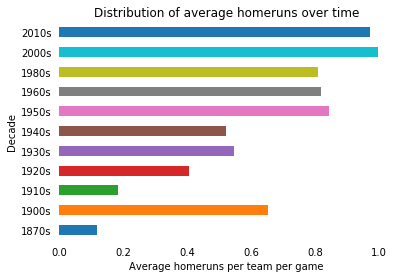

In [152]:
ax = df_homeruns['avg_homeruns'].dropna().plot.barh()
ax.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel('Average homeruns per team per game')
ax.set_ylabel('Decade')
ax.set_title('Distribution of average homeruns over time')